[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/carlos-adir/UnB-Courses/blob/main/vibracoes/sistema-massa-mola.ipynb)

In [1]:
import numpy as np
import sympy as sp
from scipy.integrate import odeint
try:
    from matplolib import pyplot as plt
except ModuleNotFoundError:
    import os
    os.system("pip install matplotlib")
    from matplotlib import pyplot as plt

# 1 - O problema

Temos um problema de dinâmica de corpo rigido com uma massa $m$ que é ligada a uma mola de constante $k$ que tem um amortecimento $c$. 
A equação é então regida por

$$
m\ddot{x} + c\dot{x} + kx = f
$$

Com as condições iniciais

* Posição inicial $x(t = 0) = x_0$
* Velocidade inicial $v(t = 0) = \dot{x}(t=0) = v_0$

# 2 - Solução analítica

Temos a equação dada por

$$
m \cdot \ddot{x} + c \cdot \dot{x} + k \cdot x = 0 
$$

A solução dessa EDO (Equação Diferencial Ordinária) é simples e envolve dizer que $x$ é na verdade uma exponencial complexa:

$$
x(t) = A \cdot \exp \left(st\right)  \ \ \ \ \ s \in \mathbb{C}
$$

De forma que obtemos a equação algébrica definida por

$$
\exp \left(st \right) \cdot A \left[ms^2 + cs + k\right] = 0
$$

Encontrando a solução dessa equação para $s$, conseguimos a EDO.
A solução é dada por

$$
s = \dfrac{-c\pm \sqrt{c^2-4mk}}{2m}
$$

Antes de analisar a solução, vamos primeiro reescrever a equação original por 

$$
\ddot{x} + 2\xi \omega \cdot \dot{x} + \omega^2 \cdot x = 0
$$

Em que

$$
\omega_n = \sqrt{\dfrac{k}{m}}
$$
$$
\xi = \dfrac{c}{2\sqrt{mk}}
$$

E para $0 < \xi < 1$, temos a frequência amortecida $\omega_d$.

$$
\omega_{d} = \omega_{n} \sqrt{1-\xi^2}
$$

Com esses dois parâmetros temos a solução

$$
s = \omega_n \left(-\xi \pm \sqrt{\xi^2 - 1}\right)
$$


E então dividimos a solução em 4 tipos diferentes:

* $\xi = 0$ (Vibração livre harmônica)

$$
x(t) = A_1 \cdot \cos \omega_n t + A_2 \cdot \sin \omega_n  t 
$$

* $0 < \xi < 1$ (Vibração livre subamortecida)

$$
x(t) =  \exp\left(-\xi \omega_n t\right) \left[ A_1 \cdot \cos \omega_d t + A_2 \cdot \sin \omega_d  t \right]
$$

* $\xi = 1$ (Vibração livre criticamente amortecida)

$$
x(t) = \exp \left(-\omega_n t\right) \cdot \left[A_1 + A_2 \cdot t\right]
$$

* $\xi > 1$ (Vibração livre super-amortecida)

$$
x(t) = A_1 \cdot \exp \left(-\omega_n t \cdot \left[\xi - \sqrt{\xi^2 - 1}\right]\right)+ A_2 \cdot \exp \left(-\omega_n t \cdot \left[\xi + \sqrt{\xi^2 - 1}\right]\right)
$$

### 2.1 - Solução para Vibração livre harmônica ($\xi = 0$)

Neste caso teremos a solução geral

$$
x(t) = A_1 \cdot \cos \omega_n t + A_2 \cdot \sin \omega_n t
$$

Cuja velocidade $v(t)$ é dada por

$$
v(t) = \dot{x}(t) = - A_1 \omega_n \sin \omega_n t + A_2 \omega_n \cos \omega_n t
$$

Já os parâmetros $A_1$ e $A_2$ vem das condições iniciais. Seja $x(t=0) = x_0$ e $\dot{x}(0) = v_0$, teremos

$$
\begin{cases}
x(0) = x_0 \\
v(0) = v_0
\end{cases} \Rightarrow
\begin{cases}
A_1 \cdot \underbrace{\cos \omega_n \cdot 0}_{1} + A_2 \cdot \underbrace{\sin \omega_n \cdot 0}_{0} = x_0 \\
-\omega_n A_2 \cdot \underbrace{\sin \omega_n \cdot 0}_{0} + \omega_n A_2 \cdot \underbrace{\cos \omega_n \cdot 0}_{1} = v_0
\end{cases}
$$

Resultando então no sistema

$$
\begin{bmatrix}
1 & 0 \\
0 & \omega_n
\end{bmatrix} \cdot \begin{bmatrix}
A_{1} \\ A_2
\end{bmatrix} = 
\begin{bmatrix}
x_0 \\ v_0
\end{bmatrix}  \Longrightarrow 
\begin{bmatrix}
A_1 \\ A_2
\end{bmatrix} = 
\begin{bmatrix}
x_0 \\ \frac{1}{\omega_n} v_0
\end{bmatrix}
$$

Ou seja, teremos a solução analítica dada por

$$
x(t) = x_0 \cdot \cos \omega_n t + \dfrac{v_0}{\omega_n} \cdot \sin \omega_n t
$$

$$
\dot{x}(t) = -x_0 \omega_n \cdot \cos \omega_n t + v_0 \cdot \cos \omega_n t
$$

In [2]:
def solucao_harmonica(wn:float, t, x0:float, v0:float):
    x = x0 * sp.cos(wn * t) + (v0/wn)* sp.sin(wn * t)
    return x

### 2.2 - Solução sub-amortecida ($0 < \xi < 1$)

Neste caso temos a solução

$$
x(t) = \exp \left(-\xi \omega_n t\right) \cdot \left[A_1 \cdot \cos \omega_d t + A_2 \cdot \sin \omega_d t \right]
$$

Cuja velocidade

$$
v(t) = \dot{x}(t) = \exp \left(-\xi \omega_n t\right) \left[(-\xi \omega_n A_1 + \omega_d A_2)\cdot \cos \omega_d t  + (-\xi \omega_n A_2 - \omega_d A_1)\cdot \sin \omega_d t\right]
$$

Os parâmetros $A_1$ e $A_2$ vem das condições iniciais. Seja $x(t=0) = x_0$ e $\dot{x}(0) = v_0$, teremos

$$
\begin{cases}
x(0) = x_0 \\
v(0) = v_0
\end{cases} \Rightarrow
\begin{cases}
\underbrace{\exp \left(-\xi \omega_n \cdot 0\right)}_{1} \cdot \left[A_1 \cdot \underbrace{\cos \omega_d \cdot 0}_{1} + A_2 \cdot \underbrace{\sin \omega_d \cdot 0}_{0} \right] = x_0 \\
\underbrace{\exp \left(-\xi \omega_n \cdot 1\right)}_{1} \left[(-\xi \omega_n A_1 + \omega_d A_2)\cdot \underbrace{\cos \omega_d \cdot 0}_{1}  + (-\xi \omega_n A_2 - \omega_d A_1)\cdot \underbrace{\sin \omega_d t}_{0}\right] = v_0
\end{cases}
$$

Resultando então no sistema

$$
\begin{bmatrix}
1 & 0 \\
-\xi \omega_n & \omega_d
\end{bmatrix} \cdot \begin{bmatrix}
A_{1} \\ A_2
\end{bmatrix} = 
\begin{bmatrix}
x_0 \\ v_0
\end{bmatrix}  \Longrightarrow 
\begin{bmatrix}
A_1 \\ A_2
\end{bmatrix} = 
\begin{bmatrix}
1 & 0 \\
\xi \frac{\omega_n}{\omega_d}& \frac{1}{\omega_d}
\end{bmatrix}
\begin{bmatrix}
x_0 \\ v_0
\end{bmatrix}
$$

Ou seja, teremos a solução analítica dada por

$$
x(t) = \exp \left(-\xi \omega_n t\right) \cdot \left[x_0 \cdot \cos \omega_d t + \left(\xi \ \dfrac{\omega_n}{\omega_d} \cdot x_0 + \dfrac{1}{\omega_d} \cdot v_0 \right) \cdot \sin \omega_d t \right]
$$

$$
\dot{x}(t) = \exp \left(-\xi \omega_n t\right) \left[ v_0 \cdot \cos \omega_d t  - \left(\left(\omega_d + \xi^2 \dfrac{\omega_{n}^2}{\omega_d}\right) \cdot x_0 + \xi \dfrac{\omega_n}{\omega_d} \cdot v_0 \right)\cdot \sin \omega_d t\right]
$$

In [3]:
def solucao_sub_amortecida(xi:float, wn:float, t, x0:float, v0:float):
    wd = wn * np.sqrt(1-xi**2)
    x = sp.exp(-xi*wn*t) * (x0 * sp.cos(wd*t) + (xi*wn*x0/wd + v0/wd) * sp.sin(wd*t))
    return x

### 2.3 - Solução para Vibração livre criticamente amortecida ($\xi = 1$)

Neste caso temos a solução

$$
x(t) = \exp \left(-\omega_n t\right) \cdot \left[A_1 + A_2 t\right]
$$

Cuja velocidade

$$
v(t) = \dot{x}(t) = \exp \left(-\omega_n t\right)\left[-\omega_n A_1 - \omega_n A_2 t + A_2 \right]
$$

Os parâmetros $A_1$ e $A_2$ vem das condições iniciais. Seja $x(t=0) = x_0$ e $\dot{x}(0) = v_0$, teremos

$$
\begin{cases}
x(0) = x_0 \\
v(0) = v_0
\end{cases} \Rightarrow
\begin{cases}
A_1 + A_2 \cdot 0 = x_0 \\
-\omega_n A_1 - \omega_n \cdot A_2 \cdot 0 +  A_2  = v_0 \\
\end{cases}
$$

Resultando então no sistema

$$
\begin{bmatrix}
1 & 0 \\
-\omega_n & 1
\end{bmatrix} \cdot \begin{bmatrix}
A_{1} \\ A_2
\end{bmatrix} = 
\begin{bmatrix}
x_0 \\ v_0
\end{bmatrix}  \Longrightarrow 
\begin{bmatrix}
A_1 \\ A_2
\end{bmatrix} = 
\begin{bmatrix}
1 & 0 \\
\omega_n & 1
\end{bmatrix}
\begin{bmatrix}
x_0 \\ v_0
\end{bmatrix}
$$

Ou seja, teremos a solução analítica dada por

$$
x(t) = \exp \left(-\omega_n t\right) \cdot \left[x_0\cdot \left(1 + \omega_n t\right) + v_0 \cdot t \right]
$$

$$
\dot{x}(t) = \exp \left(- \omega_n t\right) \left[ x_0 \cdot \omega_n^2 t + v_0 \right]
$$

In [4]:
def solucao_criticamente_amortecida(wn:float, t, x0:float, v0:float):
    x = sp.exp(-wn*t) * (x0 * (1+wn*t) + v0 * t)
    return x

### 2.4 - Solução para Vibração livre super-amortecida ($1 < \xi$)

Para faciilitar a notação, diremos

$$
\mu = \sqrt{\xi^2 - 1}
$$

$$
\alpha = \xi - \mu
$$
$$
\beta = \xi + \mu
$$

Neste caso temos a solução

$$
x(t) = A_1 \cdot \exp \left(-\alpha \omega_n t  \right)+ A_2 \cdot \exp \left(-\beta \omega_n t \right)
$$

Cuja velocidade

$$
v(t) = \dot{x}(t) = -\alpha \omega_n \cdot A_1 \exp \left(- \alpha \omega_n t\right) - \beta \omega_n  \cdot A_2 \exp \left(-\beta \omega_n t\right) 
$$

Os parâmetros $A_1$ e $A_2$ vem das condições iniciais. Seja $x(t=0) = x_0$ e $\dot{x}(0) = v_0$, teremos

$$
\begin{cases}
x(0) = x_0 \\
v(0) = v_0
\end{cases} \Rightarrow
\begin{cases}
A_1 + A_2  = x_0 \\
-\alpha \omega_n \cdot A_1  -\beta \omega_n \cdot A_2  = v_0
\end{cases}
$$

Resultando então no sistema

$$
\begin{bmatrix}
1 & 1 \\
- \alpha \omega_n & -\beta \omega_n
\end{bmatrix} \cdot \begin{bmatrix}
A_{1} \\ A_2
\end{bmatrix} = 
\begin{bmatrix}
x_0 \\ v_0
\end{bmatrix}
$$
$$
\begin{bmatrix}
A_1 \\ A_2
\end{bmatrix} = 
\dfrac{1}{2 \mu \omega_n}
\begin{bmatrix}
\beta \omega_n & 1 \\
-\alpha \omega_n & -1
\end{bmatrix}
\begin{bmatrix}
x_0 \\ v_0
\end{bmatrix}
$$

Temos a solução então

$$
x(t) = \dfrac{1}{2\mu}\left(\beta x_0 + \dfrac{v_0}{\omega_n}\right) \cdot \exp \left(-\alpha \omega_n t\right) - \dfrac{1}{2\mu}\left(\alpha x_0 + \dfrac{v_0}{\omega_n}\right) \cdot \exp \left(-\beta \omega_n t\right)
$$

$$
\dot{x}(t) = \dfrac{-\alpha}{2\mu}\left(\beta \omega_n x_0 + v_0\right) \cdot \exp \left(-\alpha \omega_n t\right) + \dfrac{\beta}{2\mu}\left(\alpha \omega_n x_0 + v_0 \right) \cdot \exp \left(-\beta \omega_n t\right)
$$



In [5]:
def solucao_super_amortecida(xi:float, wn:float, t, x0:float, v0:float):
    mu = np.sqrt(xi**2 - 1)
    alpha = xi - mu
    beta = xi + mu
    x = (beta*x0 + v0/wn)*sp.exp(-alpha*wn*t)/(2*mu)
    x -= (alpha*x0 + v0/wn)*sp.exp(-beta*wn*t)/(2*mu)
    return x

### 2.5 - Exemplo com diferentes configurações de $\xi$

Primeiro criamos a função para receber a solução para qualquer $\xi$

In [6]:
def solucao_x(xi:float, wn:float, x0:float, v0:float):
    t = sp.symbols("t")
    if xi == 0:
        x = solucao_harmonica(wn, t, x0, v0)
    if 0 < xi < 1:
        x = solucao_sub_amortecida(xi, wn, t, x0, v0)
    if xi == 1:
        x = solucao_criticamente_amortecida(wn, t, x0, v0)
    if xi > 1:
        x = solucao_super_amortecida(xi, wn, t, x0, v0)
    return sp.lambdify(t, x)

def solucao_v(xi:float, wn:float, x0:float, v0:float):
    t = sp.symbols("t")
    if xi == 0:
        x = solucao_harmonica(wn, t, x0, v0)
    if 0 < xi < 1:
        x = solucao_sub_amortecida(xi, wn, t, x0, v0)
    if xi == 1:
        x = solucao_criticamente_amortecida(wn, t, x0, v0)
    if xi > 1:
        x = solucao_super_amortecida(xi, wn, t, x0, v0)
    v = sp.diff(x, t)
    return sp.lambdify(t, v)

Agora plotamos alguns gráficos para alguns $\xi$

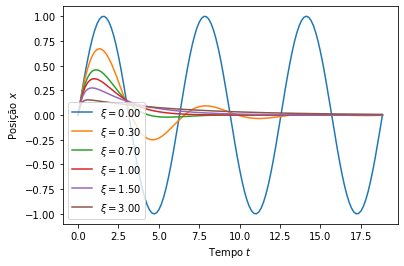

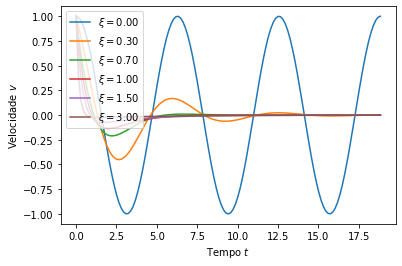

In [7]:
def show_example(xis, wn, u0, v0, nper):
    T = nper * (2*np.pi/wn)
    tplot = np.linspace(0, T, 129)

    plt.figure()
    for xi in xis:
        x_ana_func = solucao_x(xi, wn, u0, v0)
        xplot = [x_ana_func(ti) for ti in tplot]
        plt.plot(tplot, xplot, label=r"$\xi = %.2f$"%xi)
    plt.xlabel(r"Tempo $t$")
    plt.ylabel(r"Posição $x$")
    plt.legend()

    plt.figure()
    for xi in xis:
        v_ana_func = solucao_v(xi, wn, u0, v0)
        vplot = [v_ana_func(ti) for ti in tplot]
        plt.plot(tplot, vplot, label=r"$\xi = %.2f$"%xi)
    plt.xlabel(r"Tempo $t$")
    plt.ylabel(r"Velocidade $v$")
    plt.legend()

show_example(xis=[0, 0.3, 0.7, 1, 1.5, 3], wn=1, u0=0, v0=1, nper=3)

### 2.6 - Mostrando a solução analítica para um caso específico

Para os dados fornecidos teremos os gráficos abaixo da posição e velocidade

In [8]:
m = 50  # Massa (kg)
c = 2  # Constante de amortecimento (N*s/m)
k = 10  # Constante da mola (N/m)
x0 = 1  # Posicao inicial (m)
v0 = 1  # Velocidade inicial (m/s)

T = 180  # Tempo total
npts = 1000  # Numero de pontos no tempo

In [9]:
wn = np.sqrt(k/m)
xi = c/(2*np.sqrt(k*m))
print("Frequencia natural: wn = %.3f rad/s" % wn)
print("Constante amorteci: xi = %.3f " % xi)
if xi < 1:
    wd = wn * np.sqrt(1-xi**2)
    Tp = 2 * np.pi/wd
if 0 < xi < 1:
    print("Frequencia amortec: wd = %.3f rad/s" % wd)
if xi < 1:
    print("Período de uma oscilacao: Tp = %.3f s" % Tp)

Frequencia natural: wn = 0.447 rad/s
Constante amorteci: xi = 0.045 
Frequencia amortec: wd = 0.447 rad/s
Período de uma oscilacao: Tp = 14.064 s


Text(0.5, 1.0, 'Solução analítica da EDO mostrada: Velocidade')

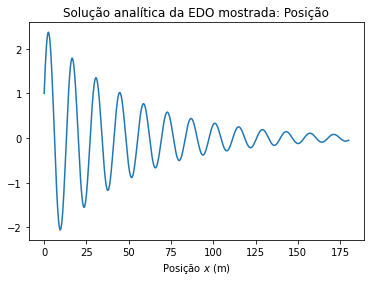

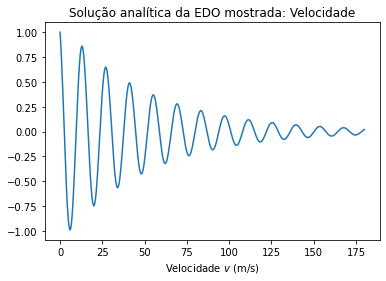

In [10]:
t = np.linspace(0, T, npts)

x_ana = solucao_x(xi, wn, x0, v0)(t)
plt.figure()
plt.plot(t, x_ana)
plt.xlabel(r"Tempo $t$ (s)")
plt.xlabel(r"Posição $x$ (m)")
plt.title(r"Solução analítica da EDO mostrada: Posição")

v_ana = solucao_v(xi, wn, x0, v0)(t)
plt.figure()
plt.plot(t, v_ana)
plt.xlabel(r"Tempo $t$ (s)")
plt.xlabel(r"Velocidade $v$ (m/s)")
plt.title(r"Solução analítica da EDO mostrada: Velocidade")

## 3 - Solução numérica

Existem diversas formas de se resolver numericamente esse problema, que são melhor analisadas em outro arquivo.
Desta forma, iremos pegar apenas uma delas

Queremos encontrar uma equação como

$$
\dot{y} = A \cdot y + B
$$

De modo geral, vamos resolver para o sistema

$$
m \cdot  \ddot{x} + c \cdot \dot{x} + k \cdot x = f(t, \ x, \ \dot{x})
$$

Podemos adicionar mais uma equação identidade que é dada por

$$
\dot{x} = \dot{x}
$$

Reescrevemos a primeira equação de forma

$$
m \cdot \ddot{x} = - c \cdot \dot{x} - k \cdot x + f(t, \ x, \ \dot{x})  
$$

De modo que podemos montar o sistema

$$
\begin{bmatrix}
1 & 0 \\
0 & m
\end{bmatrix} \cdot 
\begin{bmatrix}
\dot{x} \\
\ddot{x}
\end{bmatrix} = 
\begin{bmatrix}
0 & 1 \\
-k & -c
\end{bmatrix}
\cdot \begin{bmatrix}
x  \\ \dot{x}
\end{bmatrix} + 
\begin{bmatrix}
0 \\ f(t, \ x, \ \dot{x})
\end{bmatrix}
$$

Invertendo a matriz obtemos a equação

$$
\begin{bmatrix}
\dot{x} \\ \ddot{x}
\end{bmatrix} = 
\underbrace{
\begin{bmatrix}
0 & 1 \\
\frac{-k}{m} & \frac{-c}{m}
\end{bmatrix}}_{\left[A\right]} \cdot
\begin{bmatrix}
x \\ \dot{x}
\end{bmatrix} + 
\underbrace{
\begin{bmatrix}
0 \\ \frac{1}{m}f(t, \ x, \ \dot{x})
\end{bmatrix}}_{\left[B\right]}
$$

In [11]:
A = np.array([[0, 1],
              [-k/m, -c/m]])
B = np.zeros(2)  # Pois é oscilação livre, f = 0

O método consiste em utilizar um método ```odeint``` já implementado na biblioteca ```scipy.integrate```.

Teremos então  a função 

$$
\dfrac{dy}{dt} = \dot{y} =
\begin{bmatrix}
\dot{x} \\ \ddot{x}
\end{bmatrix} = 
\left[A\right]\cdot \begin{bmatrix}
x \\ \dot{x}
\end{bmatrix} = \left[A\right] \cdot y
$$

In [12]:
def dydt(y, t):
    return A @ y + B

Com a condição inicial

$$
y_0 = \begin{bmatrix}
x_0 \\ v_0
\end{bmatrix}
$$

In [13]:
y0 = [x0, v0]

Resolvemos então usando a função ```odeint```

In [14]:
t = np.linspace(0, T, npts)
Y_num = odeint(dydt, y0, t)

O resultado fornecido é $Y$ em que

$$
Y = \begin{bmatrix}
x_{0} & v_{0} \\
x_{1} & v_{1} \\ 
\vdots & \vdots \\
x_{n-1} & v_{n-1}
\end{bmatrix}
$$

Em que é uma aproximação do valor correto, isto é

$$
x_i \approx x(t_i)
$$
$$
v_{i} \approx v(t_i)
$$

Agora mostramos os resultados:

* Para a posição

Text(0.5, 1.0, 'Posição do sistema ao longo do tempo')

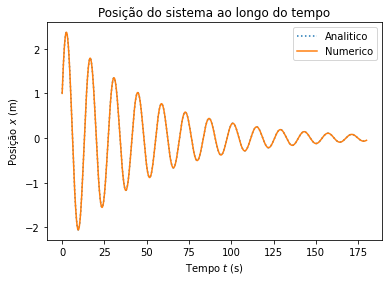

In [15]:
x_num = Y_num[:, 0]
plt.plot(t, x_ana, label="Analitico", ls="dotted")
plt.plot(t, x_num, label="Numerico")
plt.legend()
plt.xlabel(r"Tempo $t$ (s)")
plt.ylabel(r"Posição $x$ (m)")
plt.title("Posição do sistema ao longo do tempo")

* Para a velocidade

Text(0.5, 1.0, 'Velocidade do sistema ao longo do tempo')

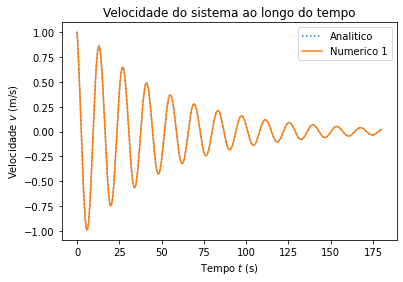

In [16]:
v_num = Y_num[:, 1]
plt.plot(t, v_ana, label="Analitico", ls="dotted")
plt.plot(t, v_num, label="Numerico 1")
plt.legend()
plt.xlabel(r"Tempo $t$ (s)")
plt.ylabel(r"Velocidade $v$ (m/s)")
plt.title("Velocidade do sistema ao longo do tempo")

Text(0.5, 1.0, 'Espiral de movimento posição x velocidade')

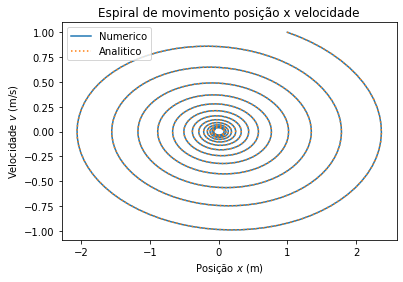

In [17]:
plt.plot(x_num, v_num, label="Numerico")
plt.plot(x_ana, v_ana, label="Analitico", ls="dotted")
plt.legend()
plt.xlabel(r"Posição $x$ (m)")
plt.ylabel(r"Velocidade $v$ (m/s)")
plt.title("Espiral de movimento posição x velocidade")

Text(0.5, 1.0, 'Energia cinética ao longo do tempo')

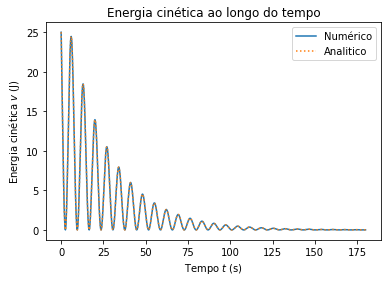

In [18]:
T_num = m*v_num**2/2
T_ana = m*(v_ana**2)/2
plt.plot(t, T_num, label="Numérico")
plt.plot(t, T_ana, label="Analitico", ls="dotted")
plt.legend()
plt.xlabel(r"Tempo $t$ (s)")
plt.ylabel(r"Energia cinética $v$ (J)")
plt.title("Energia cinética ao longo do tempo")

Text(0.5, 1.0, 'Energia potencial ao longo do tempo')

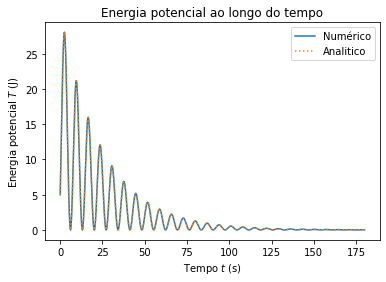

In [19]:
V_num = k*x_num**2/2
V_ana = k*(x_ana**2)/2
plt.plot(t, V_num, label="Numérico")
plt.plot(t, V_ana, label="Analitico", ls="dotted")
plt.legend()
plt.xlabel(r"Tempo $t$ (s)")
plt.ylabel(r"Energia potencial $T$ (J)")
plt.title("Energia potencial ao longo do tempo")

Text(0.5, 1.0, 'Energia total ao longo do tempo')

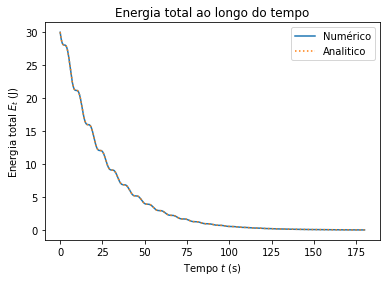

In [20]:
Et = (m*v_num**2)/2 + (k*x_num**2)/2
Et_ana = m*v_ana**2/2 + k*x_ana**2/2
plt.plot(t, Et, label="Numérico")
plt.plot(t, Et_ana, label="Analitico", ls="dotted")
plt.legend()
plt.xlabel(r"Tempo $t$ (s)")
plt.ylabel(r"Energia total $E_{t}$ (J)")
plt.title("Energia total ao longo do tempo")

## Disponível online

Esse python notebook está disponível online no GitHub através do link:

* [GitHub/carlos-adir/UnB-Courses/vibracoes/sistema-massa-mola](https://github.com/carlos-adir/UnB-Courses/blob/main/vibracoes/sistema-massa-mola.ipynb)